In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
import IPython
import soundfile as sf



<h3> Sistema </h3>

Definimos formalmente um **Sistema** como uma *entidade que manipula um ou mais sinais para realizar uma função, produzindo, assim, novos sinais*. Contudo, não podemos se apegar somente ao conceito formal. No entanto, a definição algébrica nos diz que é dito um **Sistema** se um sinal é lançado sobre a entrada é gerado um sinal de saída por uma regra de *Transformação Linear*:
- $y(t) = Tr[{x(t)}]$

Abaixo será exemplificado um Sistema através de uma implementação, utilizando as definições descritas acima.

In [4]:
x = lambda t: np.sin(t)  # the signal x(t)

def Tr(x):
    return lambda t: 2*x(t)   # the IO relation y(t)=2*x(t)

In [ ]:
t = np.linspace(-5,5,1000)
plt.plot(t, x(t), label='Input $x(t)$')
y = Tr(x)  # send x through the system
plt.plot(t, y(t), label='Output $y(t)=2x(t)$')
plt.grid()

<h3> 1- Linearidade </h3>

Diz-se que um sistema é *linear* se ele satisfazer o *princípio da superposição*. Ou seja, a resposta de um sistema linear a uma soma ponderada de sinais de entrada é igual à mesma soma ponderada de sinais de saída. Por fim, dizemos que um sistema com transformação **Tr** é *linear* se a expressão abaixo for válida:
-  $Tr[{a*x_1(t) + b*x_2(t)}] = a*Tr[{x_1(t)}] + b*Tr[{x_2(t)}]$

Na implementação abaixo, faremos justamente o que nossa descrição algébrica sugere, definiremos 2 funções com duas leis de formação diferentes e verificaremos se a *Transformação Linear da soma de duas funções* é igual a *Função das Transformadas*

In [28]:
t = np.linspace(-10, 10, 1000)
x1 = lambda t: np.sin(t)
x2 = lambda t: (t % (2*np.pi))/np.pi
x1plusx2 = lambda t: x1(t)+x2(t)
def checkLinearity(Tr,t, x1plusx2):
    
    a = np.array_equal(Tr(x1plusx2)(t), Tr(x1)(t) + Tr(x2)(t))
    plt.plot(t, Tr(x1plusx2)(t),'k--', lw=2, label=r'$Tr{\{x_1(t)+x_2(t)\}}$')
    plt.plot(t, Tr(x1)(t)+Tr(x2)(t), label=r'$Tr{\{x_1(t)} + Tr{x_2(t)\}}$')

    plt.legend()
    return a

True

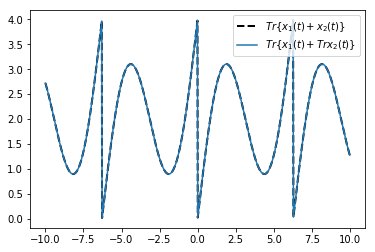

In [29]:
def Tr(x):
    return lambda t: 2*x(t)
checkLinearity(Tr,t,x1plusx2)


False

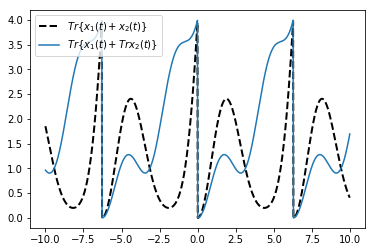

In [30]:
def  Tr ( x ): 
    return lambda  t :  x ( t ) ** 2 
checkLinearity ( Tr , t, x1plusx2 )

False

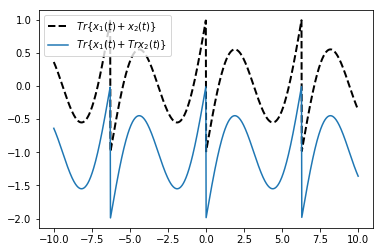

In [31]:
def  Tr ( x ): 
    return lambda  t :  x ( t ) - 1 
checkLinearity( Tr , t, x1plusx2)

Utilizamos 3 funções com leis de formações diferentes umas das outras para poder compreender como funciona a análise de *Linearidade de um Sistema*, na primeira função pudemos verificar que existiu a **o princípio da superosição** na saída do sistema, e pudemos verificar esse resultado graficamente. Porém, na segunda e terceira função não obtivemos o mesmo resultado, logo chegamos a conclusão que o terceiro sistema não é *linear*.
- 1. $y(t) = 2x(t)$ é linear
- 2. $y(t) = x(t)^2$ é não-linear
- 3. $y(t) = x(t-2)$ é não-linear

<h3>2- Causalidade </h3>

Diz-se que um sistema é *Causal* se o valor atual do sinal de saída depender **somente** dos valores presentes e/ou passados do sinal de entrada. Em contrapartida, o sinal de saída de um sistema *não causal* depende dos valores futuros do sinal de entrada.

Na implementação abaixo faremos o que a definição sugere, verificar se existe na saída uma versão retardada do sinal original. Nesta implementação utilizaremos uma breve análise do array retornado da Transformada, que é um array composto com 0's e 1's. Em contrapartida, quando a função é composta por mais 0's que 1's, temos que o sinal depende do presente e/ou passado, o que caracterica o sinal como causal.

In [111]:
t = np.linspace(-5, 5, 1000)
x = lambda t: (t>=0).astype(float)
def checkCausality(Tr1):
    funcaoTransf = Tr1(x)(t)
    temp1 = 0
    temp2 = 0
    for i in range(len(funcaoTransf)):
        if funcaoTransf[i] == 0:
            temp1 += 1
        else:
            temp2 += 1
    if temp1 >= temp2:
        plt.plot(t, x(t), label='Entrada $x(t)$')
        plt.plot(t, Tr1(x)(t), label=r'Saída $y(t)=Tr\{x(t)\}$')
        p = plt.legend()
        
        return p and True
    else:
        
        return False
  
   
    
    

True

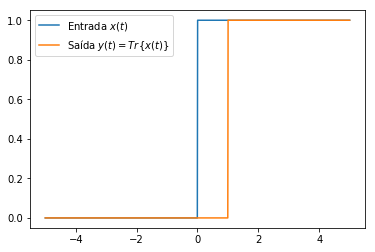

In [114]:
def Tr1(x):
    return lambda t: x(t-1)
checkCausality(Tr1)




Obviamente, o primeiro sistema, $x(t -1)$ é um sistema causal, devido sua saída ser uma versão atrasada do sinal original. No entanto, o segundo sistema, $x(t+1)$ gera uma versão avançada do sinal original, logo chegamos a breve ideia de que é um sistema *não-causal*.

<h3>3- Invariante no Tempo </h3>

Diz-se que um sistema é *invariante no tempo* se um retardo de tempo ou avanço de tempo do sinal de entrada levar a um deslocamento de tempo idêntico no sinal de saída. Isto implica que um sistema invariante no tempo reage de maneira idêntica, não importa quando o sinal de entrada seja aplicado. Em outras palavras, se por algum sinal de entrada o sinal de saída é $t_1 = Tr[{x(t}]$, em seguida , um deslocamento do tempo do sinal de entrada cri aum deslocamento de tempo no sinal de saída, ou seja, $t_2 = Tr[{x(t - t_0}] = y_1(t - t_0)$

In [7]:
t = np.linspace(-2,4, 1000)
x = lambda t: np.exp(-t)*(t>=0).astype(float)

def showTimeInvariance(Tr):
    plt.subplot(121)
    plt.plot(t, x(t), label='$x(t)$')
    plt.plot(t, x(t-0.5), label=r'$x(t-\frac{1}{2})$')
    plt.plot(t, x(t-1), label=r'$x(t-1)$')
    
    plt.subplot(122)
    y1 = Tr(x)
    y2 = Tr(lambda t: x(t-0.5))
    y3 = Tr(lambda t: x(t-1))
    plt.plot(t, y1(t), label=r'$Tr\{x(t)\}$')
    plt.plot(t, y2(t), label=r'$Tr\{x(t-\frac{1}{2})\}$')
    plt.plot(t, y3(t), label=r'$Tr\{x(t-1)\}$')
    c = np.array_equal(x1,y1)
    return c

False

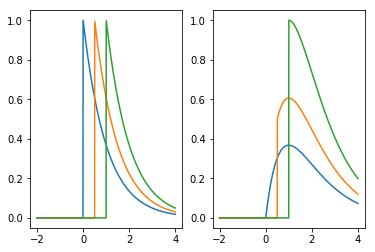

In [8]:
def Tr(x):
    return lambda t: t*x(t)
showTimeInvariance(Tr)

False

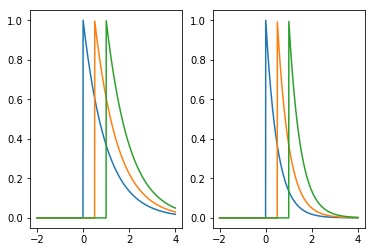

In [10]:
def Tr(x):
    return lambda t: x(t)**2
showTimeInvariance(Tr)

False

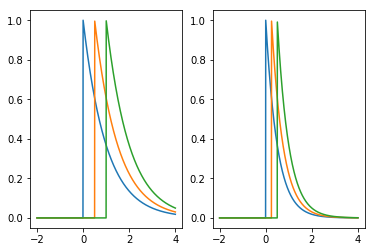

In [97]:
def Tr(x):
    return lambda t: x(2*t)
showTimeInvariance(Tr)


Nesta implementação utilizamos o **np.array_equal**  que retorna verdadeiro se doiss vetores tiverem a mesma forma e elementos, falso caso contrário, caso retornem os mesmos valores nos arrays, é dita como invariante no tempo . 


Acima foram descrito novamente 3 funções:
- Para a primeira função pudemos verificar graficamente que o sistema **não** é invariante no tempo, pois quando as entradas são impulsos exponenciais deslocados no tempo, as saídas do sistema não são apenas versões deslocadas no tempo uma da outra.

- Para a segunda função pudemos verificar graficamente que o sistema **é invariante no tempo**, uma vez que os sinais da saída são idênticos aos da entrada.

- Para a terceira função pudemos verificar graficamente que o sistema **não** é invariante no tempo, pois sua mudança de tempo não é igual ao deslocamento da entrada.






<h2> 4 Memória </h2>

Diz-se que um **sistema** possui *memória* se sua saída depender de valores passados do sinal de entrada. Em contrapartida, diz-se que um **sistema** é sem memória se seu sinal de saída depender somente do valor presente do sinal de entrada.

Na implementação abaixo, podemos verificar que ela se parece bastante com a verificação de causalidade, mas a única diferença em relação ao script de causalidade, é que nesta situação verificamos se o array retornado pelo parâmetro **np.array_equal** tem a mesma quantidade de 0's e 1's. Caso tenhamos a mesma quantidade de 0's e 1's podemos inferir que o impulso é sem memória, pois a entrada será igual a saída.

True

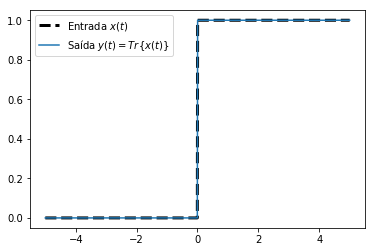

In [116]:
t = np.linspace(-5, 5, 1000)
x = lambda t: (t>=0).astype(float)
def checkMemory(Tr1):
    funcaoTransf = Tr1(x)(t)
    temp1 = 0
    temp2 = 0
    for i in range(len(funcaoTransf)):
        if funcaoTransf[i] == 0:
            temp1 += 1
        else:
            temp2 += 1
    if temp1 == temp2:
        plt.plot(t, x(t),'k--', lw=3 ,label='Entrada $x(t)$')
        plt.plot(t, Tr1(x)(t), label=r'Saída $y(t)=Tr\{x(t)\}$')
        p = plt.legend()
        
        return p and True
    else:
        
        return False
  
   
def Tr1(x):
    return lambda t: x(t)
checkMemory(Tr1)

    
    

<h2>5 Invertibilidade</h2>

<h2> 6 Estabilidade </h2>

<h3> PARTE I </h3>

- Abaixo será feito a leitura de um sinal de voz, e para isto, utilizaremos a o Scipy.io.wavfile para carregar o sinal de voz.
- Em seguida plotaremos o sinal de entrada do aúdio

In [121]:
x,fs = sf.read('C:/Users/joaos/speech.wav')
print(fs)
print(x)

48000
[-5.79833984e-04  6.10351562e-05 -1.22070312e-03 ...  9.46044922e-04
  9.46044922e-04  8.85009766e-04]


Text(0, 0.5, '$x[k]$')

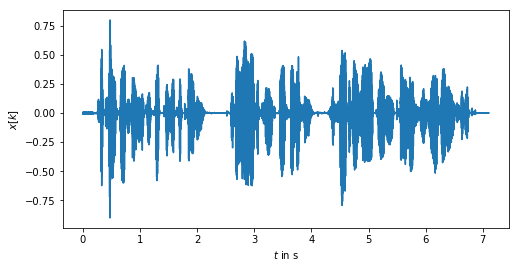

In [122]:
plt.figure(figsize=(8,4))
t = np.arange(len(x)) / fs
plt.plot(t, x)
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$x[k]$')

- Declaramos duas variaveis acima, uma chamada de **fs** que é a  taxa de amostragem retornada é um inteiro Python
- E x que serão dados que são retornados como um array numpy com um tipo de dados determinado a partir do arquivo.

De forma sucessiva, faremos a mesma coisa para a leitura de Resposta ao impuldo da sala

In [123]:
h, fsh = sf.read('C:/Users/joaos/room_impulse_response.wav')

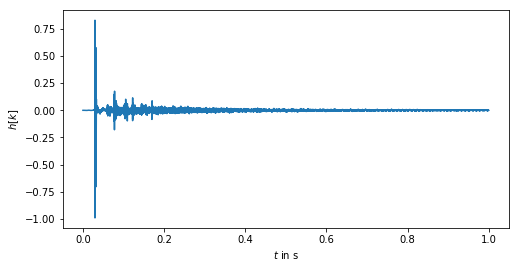

In [124]:
plt.figure(figsize=(8,4))
t = 1/fs*np.arange(len(h))
plt.plot(t, h)
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$h[k]$');


**Convolução**

Após fazer a leitura tanto do sinal de voz como a resposta ao impulso, faremos a convolução do sinal que é definida da seguinte maneira:

- O sinal da fonte x [ k ]está convolvido com a resposta ao impulso da sala h [ k ]a fim de calcular o sinal de saída y[ k ] = x [ k ] ∗ h [ k ]. O cálculo pode demorar um pouco devido à complexidade numérica envolvida.

In [125]:
y = np.convolve(h, x)

Acima, plotamos o gráfico gerado pela convolução do sinal de aúdio e a resposta ao impulso. 

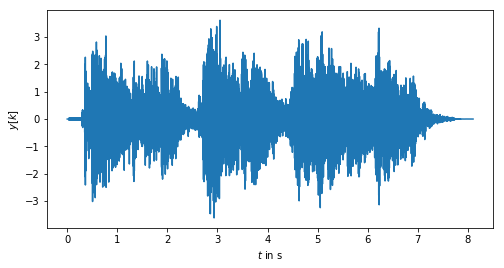

In [126]:
plt.figure(figsize=(8,4))
t = 1/fs*np.arange(len(y))
plt.plot(t,y)
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$y[k]$');



In [127]:
sf.write('dry_source.wav', x, fs)
IPython.display.Audio('dry_source.wav')


In [128]:
y = max(x) * y / np.max(np.abs(y))
sf.write('wet_source.wav', y, fs)
IPython.display.Audio('wet_source.wav')

- O sinal de entrada x [ k ]e o sinal de saída y[ k ] são normalizados e gravados em arquivos para fins de auralização(tecnicas de modelagem e simulação binaural de ambientes acusticos virtuais). Tanto que conseguimos notar a diferença entres os dois audios, no primeiro de forma mais "seca" e ou segundo mais "molhado"

**PARTE III e IV**

In [130]:
x, fs = sf.read('C:/Users/joaos/speech.wav')
delay = 0.5
alpha = 0.55
D = int(delay*fs)
y = np.zeros(len(x))
y[0:D] = x[0:D]

for i in range(D + 1,len(x)):
    y[i] = x[i] + alpha*x[i -D]
    


In [136]:
convolution_two = np.convolve(h, y)
sf.write('eco_sala.wav', convolution_two, fs)
IPython.display.Audio('eco_sala.wav')

Text(0, 0.5, '$x[k]$')

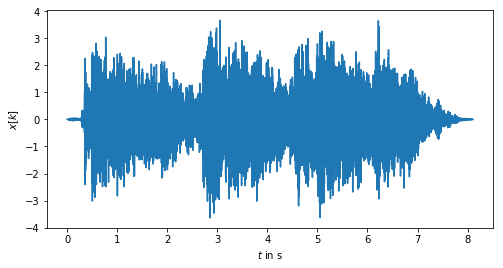

In [137]:
plt.figure(figsize=(8,4))
t = 1/fs*np.arange(len(convolution_two))
plt.plot(t, convolution_two)
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$x[k]$')

- Parte III: Acima foi feito a adição do eco, para isto utilizamos a descrição matemática que é: $\sum\limits_{x=0}^{inf} a^k \delta{n-kN} $, ou seja, $y(n) = x(n) + a y(n-N)$. Por fim, transcrevemos essa função em uma implementação em que:
 - A entrada de áudio (tempo discreto) é x.
 - A saída é y , e 0 <= $\alpha$ <1 é uma constante real
 - N é uma constante inteira no conjunto dos Naturais
 - Juntos, $\alpha$ e N determinam quanto tempo o eco dura e como soa.
 
 
- Parte IV: Depois de adicionarmos o efeito do eco ao sinal "original"l, podemos agora verificar como o eco pode atuar sobre um sinal propagando na sala. Para isso, vamos testar o efeito da convolução do sinal de entrada com eco na sala.